In [1]:
#importing all the Libraries...
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img , img_to_array
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import pickle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import models, layers


Here I trained the model on colab GPU so I upload the features files and labels files on drive and then link drive to colab.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_Features=pickle.load(open('/content/drive/MyDrive/GLCMBilateral11022023.pkl','rb'))
train_labels=pickle.load(open('/content/drive/MyDrive/Label11022023.pkl','rb'))

In [4]:
print("Train_Featues_shape: ",train_Features.shape)
print("Len of Train_Features: ",len(train_Features))
print("train_labels_shape:",train_labels)
print("train_labels_length:", len(train_labels))

Train_Featues_shape:  (5154, 100, 100)
Len of Train_Features:  5154
train_labels_shape: [0 0 0 ... 7 7 7]
train_labels_length: 5154


In [5]:
x_train,x_test,y_train,y_test=train_test_split(train_Features,train_labels,test_size=0.2,random_state=8)


In [6]:
print('shape_of_x_train: ',x_train.shape)
print("shape of y_train:",y_train.shape)
print("Len of x_train:",len(x_train))
print("len of y_train",len(y_train))

shape_of_x_train:  (4123, 100, 100)
shape of y_train: (4123,)
Len of x_train: 4123
len of y_train 4123


In [7]:
print('shape of x_test: ',x_test.shape)
print("shape of y_test:",y_test.shape)
print("Len of x_test:",len(x_test))
print("len of y_test",len(y_test))

shape of x_test:  (1031, 100, 100)
shape of y_test: (1031,)
Len of x_test: 1031
len of y_test 1031


In [8]:
x_train[0].shape

(100, 100)

In [9]:
print(type(x_train[0][0]))

<class 'numpy.ndarray'>


In [10]:
INPUT_SHAPE = (100,100,1)
n_classes=8

In [11]:
cnn_model = models.Sequential([
    layers.InputLayer(input_shape=INPUT_SHAPE),
    
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(50,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    
    
    
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    
    layers.Dense(n_classes, activation='softmax'),
])

In [12]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 50)        28850     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 50)       0

In [13]:
cnn_model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
history = cnn_model.fit(x_train,y_train,epochs=2000)

Epoch 1/2000
129/129 [==============================] - 11s 12ms/step - loss: 4.4193 - accuracy: 0.1967
Epoch 2/2000
129/129 [==============================] - 1s 10ms/step - loss: 1.7113 - accuracy: 0.2384
Epoch 3/2000
129/129 [==============================] - 1s 10ms/step - loss: 1.6762 - accuracy: 0.2949
Epoch 4/2000
129/129 [==============================] - 1s 10ms/step - loss: 1.6511 - accuracy: 0.3170
Epoch 5/2000
129/129 [==============================] - 1s 10ms/step - loss: 1.6121 - accuracy: 0.3386
Epoch 6/2000
129/129 [==============================] - 1s 10ms/step - loss: 1.5465 - accuracy: 0.3534
Epoch 7/2000
129/129 [==============================] - 1s 12ms/step - loss: 1.5216 - accuracy: 0.3594
Epoch 8/2000
129/129 [==============================] - 1s 12ms/step - loss: 1.5151 - accuracy: 0.3485
Epoch 9/2000
129/129 [==============================] - 1s 11ms/step - loss: 1.4901 - accuracy: 0.3616
Epoch 10/2000
129/129 [==============================] - 1s 10ms/step - 

In [15]:
cnn_model.save('FishRecoModel_2000_11022023.h5')

In [16]:
cnn_model.evaluate(x_test,y_test)

33/33 [==============================] - 0s 6ms/step - loss: 0.5514 - accuracy: 0.7944


[0.5513673424720764, 0.794374406337738]

In [17]:
acc = history.history['accuracy']
loss = history.history['loss']
print("Accuracy: ", acc)
print("Loss: ", loss)

Accuracy:  [0.19670143723487854, 0.23841862380504608, 0.2949308753013611, 0.31700217723846436, 0.3385884165763855, 0.35338345170021057, 0.35944700241088867, 0.34853261709213257, 0.3616298735141754, 0.35580888390541077, 0.3616298735141754, 0.3689061403274536, 0.3715741038322449, 0.37278681993484497, 0.39000728726387024, 0.39000728726387024, 0.38394373655319214, 0.40941062569618225, 0.3946155607700348, 0.4249333143234253, 0.42881396412849426, 0.36575308442115784, 0.3938879370689392, 0.4091680943965912, 0.4001940190792084, 0.3994663953781128, 0.41668689250946045, 0.3834586441516876, 0.387339323759079, 0.4188697636127472, 0.4176570475101471, 0.4135338366031647, 0.42517584562301636, 0.42275041341781616, 0.4268736243247986, 0.4278438091278076, 0.43245211243629456, 0.42396312952041626, 0.4426388442516327, 0.41741451621055603, 0.43196702003479004, 0.44457918405532837, 0.43924325704574585, 0.4351200461387634, 0.4297841489315033, 0.4326946437358856, 0.44821733236312866, 0.44651952385902405, 0.44

In [18]:
print("Maximum_Accuracy:",max(acc))

Maximum_Accuracy: 0.8816395998001099


In [19]:
print("Maximum_Loss",min(loss))

Maximum_Loss 0.295171856880188


**Maximum accuracy of model:  0.9445000290870667 or 94.5%**

**Maximum loss of model: 0.15628986060619354 or 15.6%**

In [20]:
epochs = range(len(acc))
print(epochs)

range(0, 2000)


**Model accuracy Graph with number of epochs...**

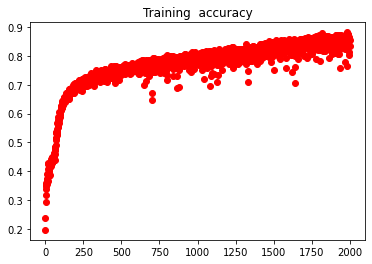

In [21]:
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.title('Training  accuracy')
plt.show()

In [22]:
# Accuracy graph of each epochs.

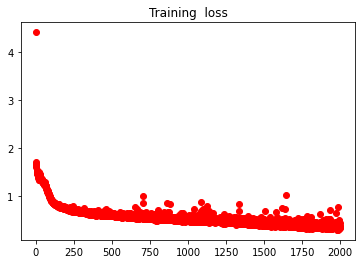

In [23]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.title('Training  loss')
plt.show()